# Gradient Descent Algorithm and comparison to inbuilt OLS Model(Linear Regression)

## Gradient Descent Algorithm

Gradient Descent is an iterative optimization algorithm to find the minimum of a function.

The aim of Gradient descent algorithm is to find an optimal line that can represent all the points with least error.

In [19]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
x = np.array([   1,   51,  101,  151,  201,  251,  301,  351,  401,  451,  501,
        551,  601,  651,  701,  751,  801,  851,  901,  951, 1001, 1051,
       1101, 1151, 1201, 1251, 1301, 1351, 1401, 1451, 1501, 1551, 1601,
       1651, 1701, 1751, 1801, 1851, 1901, 1951])

Y = np.array([-0.11, 1.51, 0.2, 3.26, 3.38,
 2.08, .56, 3.38, 4.16, 3.79, 3.65, 5.54, 6.68,
 4.74, 8.13, 7.94, 7.25, 7.91, 6.91, 8.25, 7.39, 
 7.55, 7.95, 7.9, 8.9, 9.89, 9.81, 8.89, 9.33,
 11.74, 11.4, 13.04, 12.32, 10.85,9.89, 13.27,
 15.14, 15.03, 13.51, 14.66])

In [3]:

# Fix the initial values of the parameters
a_in= 2
b_in= 10

# Appending the initial values of intercept and coefficient into arrays to check 
# if optimal values have been reached (One of the exit conditions of Gradient Descent)
list_a=[a_in]
list_b=[b_in]

# Fix learning rate and error rate
learning_rate=0.00001
error_rate=0.00001

N=len(x)

# Cost Function
def cost(a,b):
    return (np.square(Y-(a+(b*x)))/N).sum()

# Derivative of cost funtion w.r.t coefficient
def cost_der_a(a,b,Y,x):
    return ((-(Y-(a+(b*x)))).sum())/N

# Derivative of cost funtion w.r.t intercept
def cost_der_b(a,b,Y,x):
    return (((-(Y-(a+(b*x))))*x).sum())/N

error_a=0.1
error_b=0.1
i=0


# Tuning the values of intercept and coefficient inorder to find a best fit line such that the cost function is minimal

while np.abs(error_a)>error_rate or np.abs(error_b)>error_rate : 
    
    A=cost_der_a(list_a[i],list_b[i],Y,x)
    B=cost_der_b(list_a[i],list_b[i],Y,x)
    a_in=a_in - (learning_rate*A)/N
    b_in=b_in - (learning_rate*B)/N
    list_a.append(a_in)
    list_b.append(b_in)
    error_a=list_a[i+1]-list_a[i]
    error_b=list_b[i+1]-list_b[i]
    i=i+1
    print('a_in:',a_in,'b_in:',b_in)
    continue

a_in: 1.9975614229375 b_in: 6.7877113791875
a_in: 1.9959066449081226 b_in: 4.607934026404616
a_in: 1.9947837329665188 b_in: 3.1287925579501477
a_in: 1.9940217318239457 b_in: 2.125084779769538
a_in: 1.993504635569749 b_in: 1.4439942110458541
a_in: 1.993153725543595 b_in: 0.9818234748183086
a_in: 1.992915585264808 b_in: 0.6682061686474324
a_in: 1.9927539676682617 b_in: 0.45539344162308465
a_in: 1.9926442764175138 b_in: 0.31098413802041325
a_in: 1.9925698210642677 b_in: 0.21299165769522152
a_in: 1.992519275894835 b_in: 0.14649645302378084
a_in: 1.9924849555679782 b_in: 0.10137449847068047
a_in: 1.9924616450066124 b_in: 0.0707558878144588
a_in: 1.9924458053920744 b_in: 0.04997887743084281
a_in: 1.99243503537203 b_in: 0.035880126668899136
a_in: 1.9924277054498638 b_in: 0.026313073023185786
a_in: 1.9924227098906198 b_in: 0.01982111377581027
a_in: 1.992419298370681 b_in: 0.0154158353714287
a_in: 1.9924169617395258 b_in: 0.01242652551190594
a_in: 1.9924153545005605 b_in: 0.01039805589144575
a_

In [4]:
print(a_in,b_in)

1.9924111744833264 0.0061344655852984846


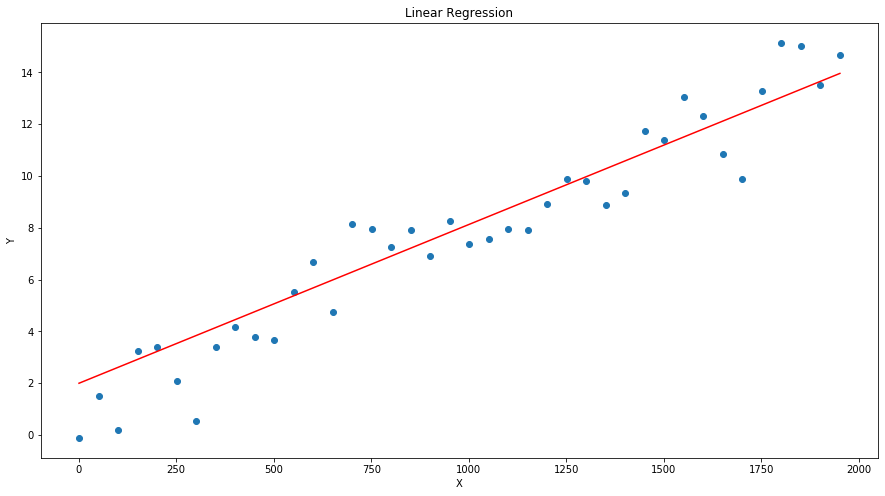

In [5]:
#Ploting the best fit line

plt.figure(figsize=(15,8))

plt.scatter(x,Y,label='Observed')
plt.plot(x,(a_in+b_in*x),color='r',label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

## Linear Regresion with stats models

Linear Regression is an approach of modeling a linear Relationship between a target variable/dependent variable and one or more independent variables.

In [6]:
X=pd.DataFrame(x)

In [7]:
y=pd.DataFrame(Y)

In [9]:
import statsmodels.api as sm

In [12]:
X=sm.add_constant(X)
lr=sm.OLS(y,X).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     466.6
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           6.09e-23
Time:                        16:27:28   Log-Likelihood:                -61.906
No. Observations:                  40   AIC:                             127.8
Df Residuals:                      38   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9521      0.362      2.627      0.0

In [14]:
a_in,b_in=lr.params

print(a_in,b_in)

0.952057992495312 0.006905422138836773


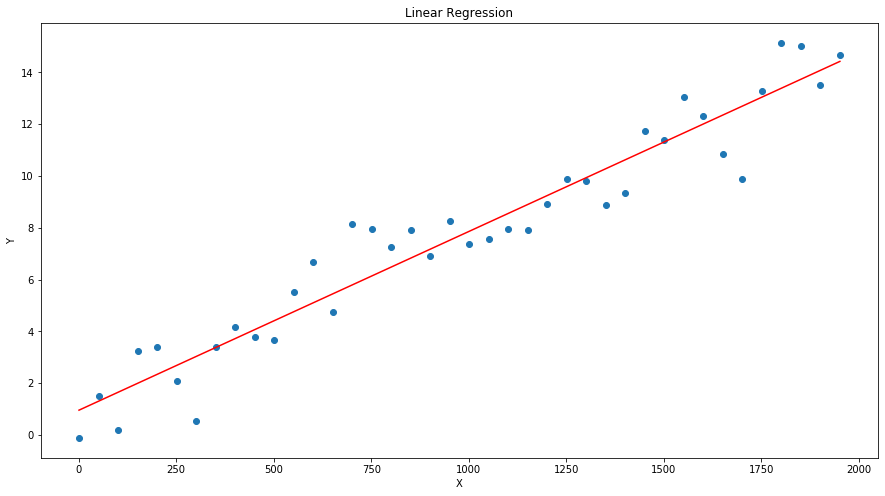

In [15]:
#Ploting the best fit line

plt.figure(figsize=(15,8))

plt.scatter(x,Y,label='Observed')
plt.plot(x,(a_in+b_in*x),color='r',label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

## Linear Regression with Sklearn

In [16]:
linearmodel=LinearRegression()
linearmodel.fit(X,y)


LinearRegression()

In [22]:
# Coefficient Value
linearmodel.coef_[0][1]

0.006905422138836773

In [18]:
# Intercept Value
linearmodel.intercept_

array([0.95205799])

In [25]:
a_in,b_in=linearmodel.intercept_,linearmodel.coef_[0][1]


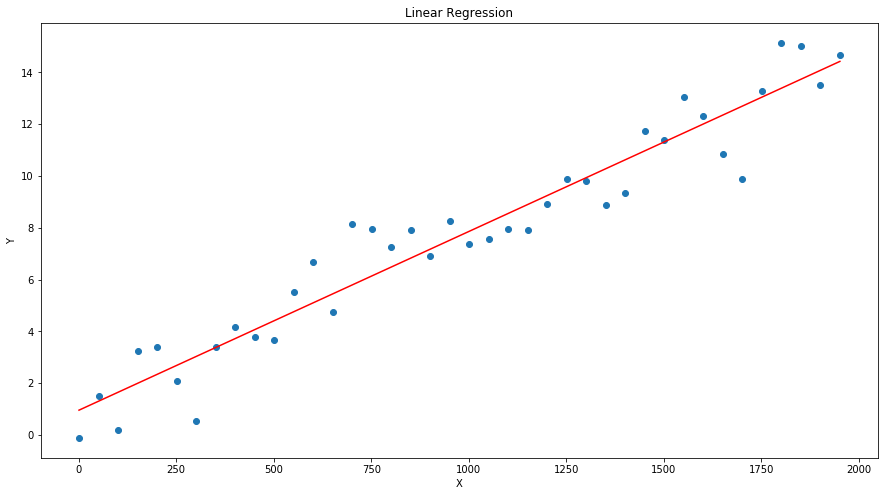

In [26]:
#Ploting the best fit line

plt.figure(figsize=(15,8))

plt.scatter(x,Y,label='Observed')
plt.plot(x,(a_in+b_in*x),color='r',label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

Note : Linear Regression and OLS provided very similar results. The main advantage of using OLS module is that an inbuilt summary report can be obtained using the summary function.

Note: The small difference in the coefficient and intercept values of Gradient descent algorithm and OLS model are because of the predifined initial values and a constraint set on the number of iterations.

On tuning the initial parameters the results can be made more identical.
    
    
